# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu

##  <u>References and sources </u>

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
SVM.Breast.ipynb 

SVM.Iris.ipynb

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [17]:
np.random.seed(42)

#### Code the solution

#### 1.Load the data. 

In [18]:
mRNA_file = pd.read_csv(r'/content/homework4_input_data.csv')

In [19]:
df = pd.DataFrame(mRNA_file, columns=mRNA_file.columns)
df.head()
columns = df.columns[1:3001]
X = df[columns]
Y = df['Class']
df['Class'] = Y

class_names = ["Bladder","Breast","Colon","Glioblastoma","Head&Neck","Kidney","Leukemia","LungAdeno","LungSquamous","Ovarian","Rectal","Uterine"]
print(X.shape, Y.shape)

(4336, 3000) (4336,)


In [20]:
df.describe()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
count,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,...,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000
mean,6.493217,0.875979,2.547433,2.024070,2.788808,2.838891,2.413940,5.273215,4.531003,6.358596,...,1.347919,4.490551,1.933813,1.628066,2.083775,1.000454,7.176974,6.762318,1.764221,3.516539
std,1.341540,1.322937,1.712000,1.442751,1.385994,1.147753,1.535475,1.570749,1.198838,1.524787,...,1.342945,1.281910,1.314929,1.694187,1.368720,1.282440,1.285927,3.121063,1.190842,1.496502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807468,0.000000,0.000000,0.000000
25%,5.697111,0.000000,1.105780,0.999840,1.810114,2.055747,1.497904,4.215464,3.813267,5.600968,...,0.350634,3.745679,1.122227,0.288757,1.079199,0.000000,6.466050,5.784987,0.875012,2.394757
50%,6.588478,0.279846,2.391468,1.710090,2.679240,2.630627,2.061542,5.211668,4.398703,6.357384,...,0.897331,4.490178,1.567558,0.999664,1.784131,0.428042,7.346725,7.762936,1.421289,3.475282
75%,7.415357,1.159160,3.819411,2.976235,3.748897,3.439166,2.858414,6.405440,5.331706,7.364287,...,2.088001,5.119473,2.091528,2.583887,2.742996,1.499093,8.090525,8.925813,2.575496,4.371683
max,10.753816,6.531445,8.714974,7.458509,7.685174,7.041480,10.548175,10.840692,8.464498,10.031628,...,7.199111,9.034211,7.237835,7.120254,6.901291,5.933580,11.307692,14.115754,6.007571,8.039268


#### 2. Produce a PCA plot of the input data, using the colors specified above.

In [21]:
colors = {"Bladder": '#19c5e3',
         "Breast": '#4287f5',
         "Colon": '#80d941',
         "Glioblastoma": '#179933',
         "Head&Neck": '#f07e78',
         "Kidney": '#f01e13',
         "Leukemia": '#f0841f',
         "LungAdeno": '#db5209',
         "LungSquamous": '#ce8ced',
         "Ovarian": '#551075',
         "Rectal": '#e3d329',
         "Uterine": '#cc3423'}

In [22]:
pca_cancer = PCA(n_components=2)
principalComponents = pca_cancer.fit_transform(X)
pca_df = pd.DataFrame(data = principalComponents, columns=['pc1', 'pc2'])
pca_df

,pc1,pc2
0,82.045989,46.713045
1,76.722515,37.919089
2,76.643204,39.867660
3,74.817222,36.351110
4,79.694762,43.781024
...,...,...
4331,-0.807812,-18.340427
4332,26.635546,6.047577
4333,-6.453130,-2.468526
4334,1.549730,3.374944


In [23]:
print('Explained variation per principal component: {}'.format(pca_cancer.explained_variance_ratio_))

Explained variation per principal component: [0.09 0.08]


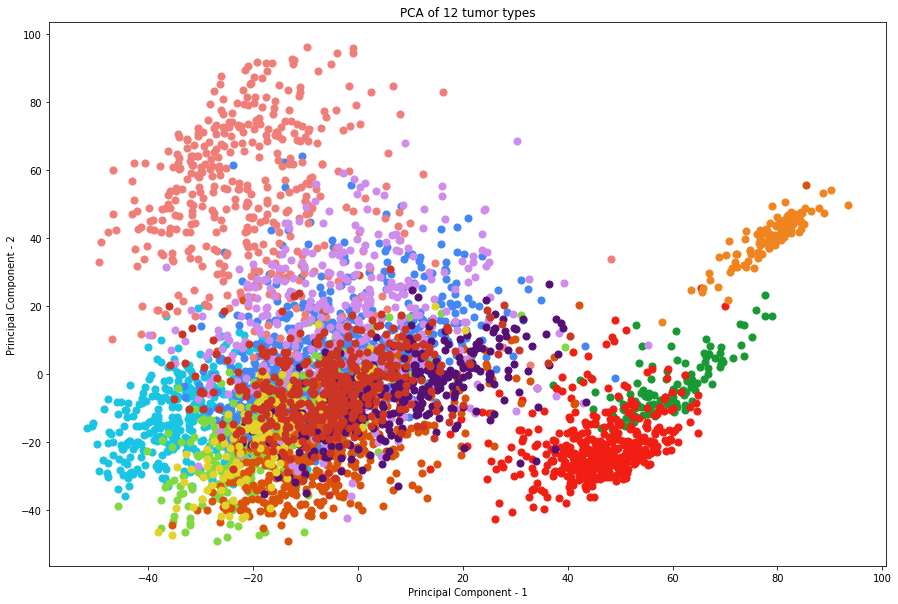

In [24]:
plt.figure(figsize=(15,10))
plt.xlabel('Principal Component - 1')
plt.ylabel('Principal Component - 2')

for tumor in colors:
    indicesToKeep = df['Class'] == tumor
    plt.scatter(pca_df.loc[indicesToKeep, 'pc1'], pca_df.loc[indicesToKeep, 'pc2'], c = colors[tumor], s = 50)
    
plt.title('PCA of 12 tumor types')
plt.show()

#### 3. Normalize the data using StandardScaler. 

In [25]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

#### 4. Break the data into the training and test datasets at 80/20 proportion.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468,), (868, 3000), (868,))

#### 5. Define SVM model hyperparameters of your choice 

In [27]:
model = LinearSVC(multi_class='ovr', class_weight='balanced').fit(X_train, Y_train)

#### 6. Run and report results from 5-fold cross-validation.

In [28]:
cross_vals = cross_val_score(model, X_train, Y_train, cv=5)
print('Individual cross-validation accuracies: ' + str(cross_vals))
print('Mean cross validation accuracy: ' + str(cross_vals.mean()))

Individual cross-validation accuracies: [0.96 0.97 0.96 0.97 0.97]
Mean cross validation accuracy: 0.9639574002686395


#### 7. Train the final model on all the training data and assess model performance on the test set.

In [29]:
print('Accuracy of linear SVC on training set: {:.2f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.98


####8. Plot two confusion matrices for test set predictions 

Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  69   0   0   0   0   0   0   0   5   0]
 [  0   0   0  21   0   0   0   0   0   0   0   2]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   2   0   0   0]
 [  0   0   0   0   0   0   2   2  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0   8   0   0   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.93 0.   0.   0.   0.   0.   0.   0.   0.07 0.  ]
 [0.   0.   0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.09]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.02 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.03 0.03 0.95 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.31 0.   0.   0.   0.   0.   0.   0.   0.69 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


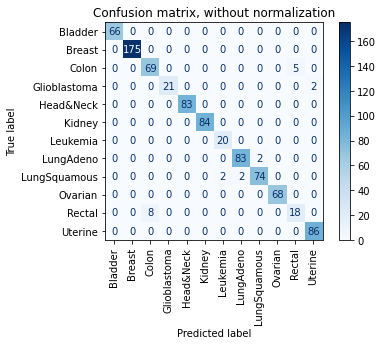

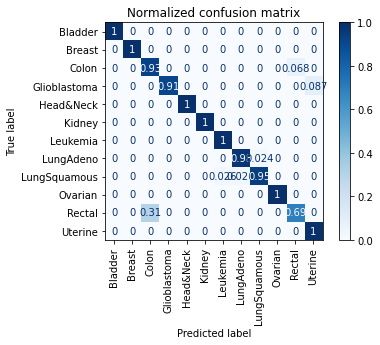

In [30]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    plt.xticks(rotation=90)
    print(disp.confusion_matrix)

plt.show()